# CRF fine-grained experiments analysis

In [74]:
from collections import defaultdict
from pprint import pprint
import os

from pymongo import MongoClient
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

In [3]:
client = MongoClient(os.environ['SACRED_MONGO_URL'])
db = client[os.environ['SACRED_DB_NAME']]

## Best configuration

In [13]:
def get_data(run_criteria):
    data = defaultdict(list)
    for run in db.runs.find(run_criteria):
        data['run_id'].append(run['_id'])
        for conf in 'c2 min_freq use_prefix use_suffix use_wordshape window'.split():
            data[conf].append(run['config'][conf])
        for which in ('train', 'dev'):
            metric_name = f'final_f1({which})'
            metric = db.metrics.find_one({'run_id': run['_id'], 'name': metric_name})
            if metric is not None:
                if len(metric['values']) != 1:
                    print(f"run {run['_id']} metric {metric_name} has length != 1, taking the last one")
                data[metric_name].append(metric['values'][-1])
    return data

### Fold 1

In [4]:
db.runs.count({'experiment.name': 'id-pos-tagging-crf-fine-fold1', 'status': 'COMPLETED'})

50

In [6]:
run_criteria = {'experiment.name': 'id-pos-tagging-crf-fine-fold1', 'status': 'COMPLETED'}

In [14]:
df = pd.DataFrame(get_data(run_criteria))

In [15]:
df.head()

,c2,final_f1(dev),final_f1(train),min_freq,run_id,use_prefix,use_suffix,use_wordshape,window
0,0.013532,0.940546,0.993455,1,23,False,False,True,4
1,0.017698,0.959884,0.986087,4,24,True,True,False,2
2,0.954260,0.958111,0.980786,1,25,True,True,True,2
3,0.069159,0.954609,0.996956,2,26,True,False,False,4
4,0.019186,0.945468,0.994915,3,27,False,True,False,5


In [16]:
df['final_f1(dev)'].idxmax()

18

In [17]:
df.iloc[df['final_f1(dev)'].idxmax()]

c2                 0.0223126
final_f1(dev)       0.960338
final_f1(train)     0.989564
min_freq                   1
run_id                    41
use_prefix              True
use_suffix             False
use_wordshape          False
window                     1
Name: 18, dtype: object

### Fold 2

In [18]:
run_criteria = {'experiment.name': 'id-pos-tagging-crf-fine-fold2', 'status': 'COMPLETED'}

In [19]:
df = pd.DataFrame(get_data(run_criteria))

In [20]:
df.head()

,c2,final_f1(dev),final_f1(train),min_freq,run_id,use_prefix,use_suffix,use_wordshape,window
0,0.010775,0.953605,0.962854,3,73,True,False,True,0
1,0.505165,0.941358,0.949741,5,74,False,True,False,0
2,0.361862,0.957621,0.996979,1,75,True,True,False,4
3,0.001021,0.950308,0.996845,4,76,True,True,False,5
4,0.819127,0.957711,0.976038,3,77,True,True,False,2


In [21]:
df.iloc[df['final_f1(dev)'].idxmax()]

c2                 0.169665
final_f1(dev)      0.964613
final_f1(train)    0.988525
min_freq                  1
run_id                   89
use_prefix             True
use_suffix             True
use_wordshape         False
window                    1
Name: 16, dtype: object

### Fold 3

In [22]:
run_criteria = {'experiment.name': 'id-pos-tagging-crf-fine-fold3', 'status': 'COMPLETED'}
df = pd.DataFrame(get_data(run_criteria))
df.iloc[df['final_f1(dev)'].idxmax()]

c2                 0.0151549
final_f1(dev)       0.959867
final_f1(train)     0.999276
min_freq                   1
run_id                   150
use_prefix              True
use_suffix              True
use_wordshape          False
window                     3
Name: 27, dtype: object

### Fold 4

In [23]:
run_criteria = {'experiment.name': 'id-pos-tagging-crf-fine-fold4', 'status': 'COMPLETED'}
df = pd.DataFrame(get_data(run_criteria))
df.iloc[df['final_f1(dev)'].idxmax()]

c2                 0.189562
final_f1(dev)      0.963507
final_f1(train)    0.991749
min_freq                  1
run_id                  205
use_prefix             True
use_suffix             True
use_wordshape          True
window                    2
Name: 32, dtype: object

### Fold 5

In [24]:
run_criteria = {'experiment.name': 'id-pos-tagging-crf-fine-fold5', 'status': 'COMPLETED'}
df = pd.DataFrame(get_data(run_criteria))
df.iloc[df['final_f1(dev)'].idxmax()]

c2                 0.00762765
final_f1(dev)        0.963838
final_f1(train)      0.986588
min_freq                    2
run_id                    234
use_prefix               True
use_suffix               True
use_wordshape           False
window                      1
Name: 11, dtype: object

## Features analysis

In [45]:
data = defaultdict(list)
for fold in range(1, 6):
    run_criteria = {'experiment.name': f'id-pos-tagging-crf-fine-fold{fold}', 'status': 'COMPLETED'}
    fold_data = get_data(run_criteria)
    fold_data['fold'] = [fold] * len(fold_data['run_id'])
    for key, val in fold_data.items():
        data[key].extend(val)

In [46]:
df = pd.DataFrame(data)

In [47]:
df.head()

,c2,final_f1(dev),final_f1(train),fold,min_freq,run_id,use_prefix,use_suffix,use_wordshape,window
0,0.013532,0.940546,0.993455,1,1,23,False,False,True,4
1,0.017698,0.959884,0.986087,1,4,24,True,True,False,2
2,0.954260,0.958111,0.980786,1,1,25,True,True,True,2
3,0.069159,0.954609,0.996956,1,2,26,True,False,False,4
4,0.019186,0.945468,0.994915,1,3,27,False,True,False,5


### Binary features

#### use_prefix

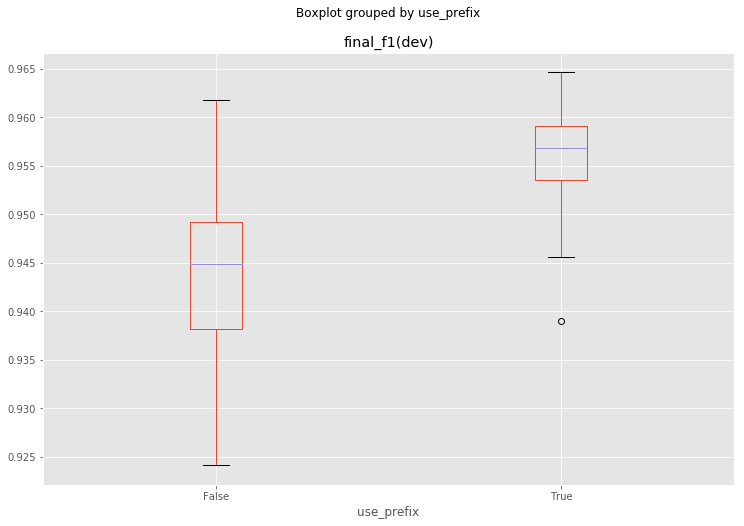

In [48]:
df.boxplot(by='use_prefix', column='final_f1(dev)', figsize=(12, 8))

In [49]:
stats.ttest_ind(df[df.use_prefix]['final_f1(dev)'], df[~df.use_prefix]['final_f1(dev)'])

Ttest_indResult(statistic=16.55650766924044, pvalue=5.640707785410764e-42)

We see that `use_prefix=True` is significantly better than than `use_prefix=False` with p < 0.05.

#### use_suffix

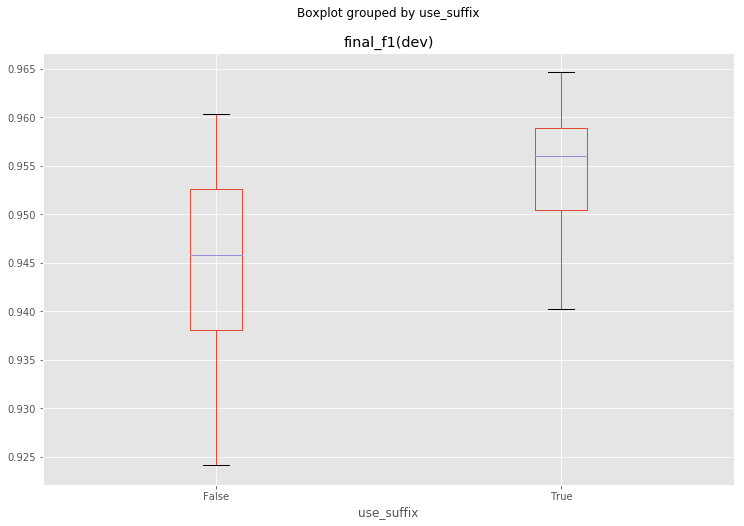

In [50]:
df.boxplot(by='use_suffix', column='final_f1(dev)', figsize=(12, 8))

In [51]:
stats.ttest_ind(df[df.use_suffix]['final_f1(dev)'], df[~df.use_suffix]['final_f1(dev)'])

Ttest_indResult(statistic=10.401404843565183, pvalue=2.9021622719104793e-21)

Similarly, we see that `use_suffix=True` is significantly better than than `use_suffix=False` with p < 0.05.

#### use_wordshape

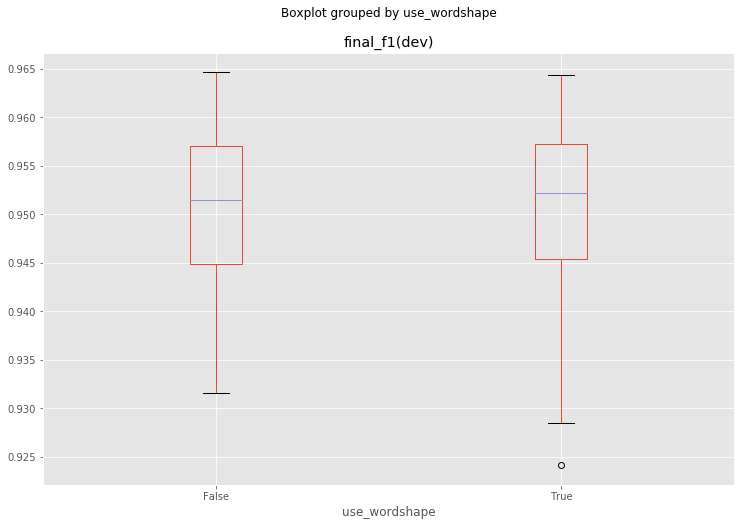

In [52]:
df.boxplot(by='use_wordshape', column='final_f1(dev)', figsize=(12, 8))

In [53]:
stats.ttest_ind(df[df.use_wordshape]['final_f1(dev)'], df[~df.use_wordshape]['final_f1(dev)'])

Ttest_indResult(statistic=0.09895401967643712, pvalue=0.92125471447865)

The p-value indicates that the effect of wordshape feature does not seem significant.

### Multinomial features

#### min_freq

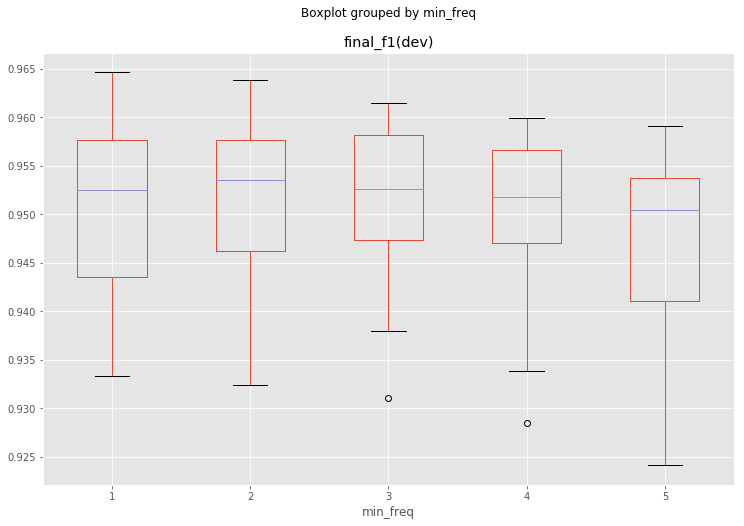

In [54]:
df.boxplot(by='min_freq', column='final_f1(dev)', figsize=(12, 8))

In [61]:
df.min_freq.unique()

array([1, 4, 2, 3, 5])

In [63]:
samples = []
for min_freq in df.min_freq.unique():
    samples.append(df[df.min_freq == min_freq]['final_f1(dev)'])

In [64]:
stats.f_oneway(*samples)

F_onewayResult(statistic=1.7977845105065469, pvalue=0.12986219819266515)

There does not seem any significant difference between different values for `min_freq` as the p-value is high.

#### window

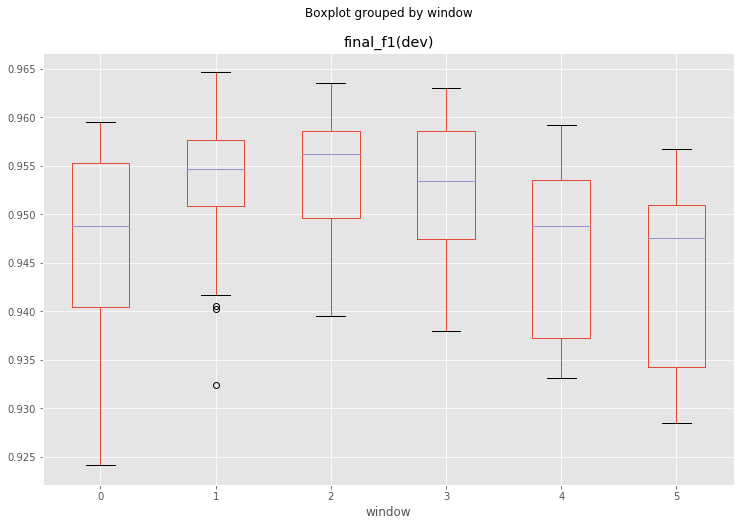

In [65]:
df.boxplot(by='window', column='final_f1(dev)', figsize=(12, 8))

In [66]:
df.window.unique()

array([4, 2, 5, 1, 3, 0])

In [67]:
samples = []
for window in df.window.unique():
    samples.append(df[df.window == window]['final_f1(dev)'])

In [68]:
stats.f_oneway(*samples)

F_onewayResult(statistic=11.790755433176717, pvalue=3.1740524157332817e-10)

Based on the ANOVA test, it seems there is a significant difference among the F1 means of different values of `window`. Looking at the boxplot, we see that the highest median is achieved by `window=2`. Let's see if its differences from the next two highest median, `window=1` and `window=3` are significant.

In [69]:
stats.ttest_ind(df[df.window == 2]['final_f1(dev)'], df[df.window == 1]['final_f1(dev)'])

Ttest_indResult(statistic=0.03084869897194743, pvalue=0.9754549199730077)

In [70]:
stats.ttest_ind(df[df.window == 2]['final_f1(dev)'], df[df.window == 3]['final_f1(dev)'])

Ttest_indResult(statistic=1.141922634458325, pvalue=0.2566556633323037)

The p-values are high, so there seems no significant difference. Let's compare with `window=0` (no context) and `window=4`.

In [71]:
stats.ttest_ind(df[df.window == 2]['final_f1(dev)'], df[df.window == 0]['final_f1(dev)'])

Ttest_indResult(statistic=3.8396633860739846, pvalue=0.0002452406391284908)

In [72]:
stats.ttest_ind(df[df.window == 2]['final_f1(dev)'], df[df.window == 4]['final_f1(dev)'])

Ttest_indResult(statistic=4.942907218140948, pvalue=3.490921859979387e-06)

We see that the p-values are less than 0.05, indicating significant differences. So, we can conclude that context (`window > 0`) is useful but too many of it (`window >= 4`) is bad. The optimal value for the context window seems to be between 1 and 3 (inclusive).

### Numerical features

#### c2

In [75]:
df['log10_c2'] = np.log10(df['c2'])

In [76]:
df.head()

,c2,final_f1(dev),final_f1(train),fold,min_freq,run_id,use_prefix,use_suffix,use_wordshape,window,log10_c2
0,0.013532,0.940546,0.993455,1,1,23,False,False,True,4,-1.868630
1,0.017698,0.959884,0.986087,1,4,24,True,True,False,2,-1.752066
2,0.954260,0.958111,0.980786,1,1,25,True,True,True,2,-0.020333
3,0.069159,0.954609,0.996956,1,2,26,True,False,False,4,-1.160149
4,0.019186,0.945468,0.994915,1,3,27,False,True,False,5,-1.717007


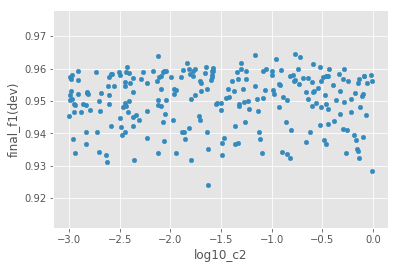

In [77]:
df.plot.scatter(x='log10_c2', y='final_f1(dev)')

There does not seem any trend between `c2` and dev F1 score, which is surprising because regularization usually helps. Could this mean that the model underfits? It is interesting to verify this by plotting a learning curve, although we can see that the model achieves a very high training F1.

## Conclusion

From the analysis, we can conclude that:

- Incorporating prefix and suffix helps
- Wordshape does not seem to help
- The effect of minimum feature frequency is not clear
- Contextual features help, with optimal context window size is between 1 and 3
- L2 regularization does not seem to have an effect on performance, so it might be interesting to check if the model underfits